## Clusteranalyse

Importieren der Bibliotheken und einlesen der Daten

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 1. Daten einlesen
try:
    df = pd.read_csv('/Users/tobiaswachtel/Documents/GitHub/Data_Mining_WB_DBU/hotel_bookings_processed.csv')
except FileNotFoundError:
    print("Die Datei wurde nicht gefunden. Bitte überprüfen Sie den Dateipfad.")
    raise

Überprüfung auf fehlende Werte innerhalb der Tabelle

In [ ]:

if df.isnull().values.any():
    print("Die Daten enthalten fehlende Werte. Bitte bereinigen Sie die Daten.")
    raise ValueError("Fehlende Werte in den Daten gefunden.")

Überblick über die Daten verschaffen

In [ ]:
print(df.head())
print(df.info())

          hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  \
0                        0                     0       2  ...   
1                        0        

Auswahl welche Features geclustert werden sollen

In [ ]:
# 2. Auswahl der relevanten Features
features = ['is_canceled','is_repeated_guest']

In [30]:
# Überprüfung der Spaltennamen
missing_features = [feature for feature in features if feature not in df.columns]
if missing_features:
    print(f"Die folgenden Features fehlen in den Daten: {missing_features}")
    raise KeyError(f"Features fehlen: {missing_features}")

data = df[features]

In [31]:
# Überprüfung auf fehlende Werte in den ausgewählten Features
if data.isnull().values.any():
    print("Die ausgewählten Features enthalten fehlende Werte. Bitte bereinigen Sie die Daten.")
    raise ValueError("Fehlende Werte in den ausgewählten Features gefunden.")

In [32]:

# 3. Vorverarbeitung: Skalierung der Daten
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (4) found smaller than

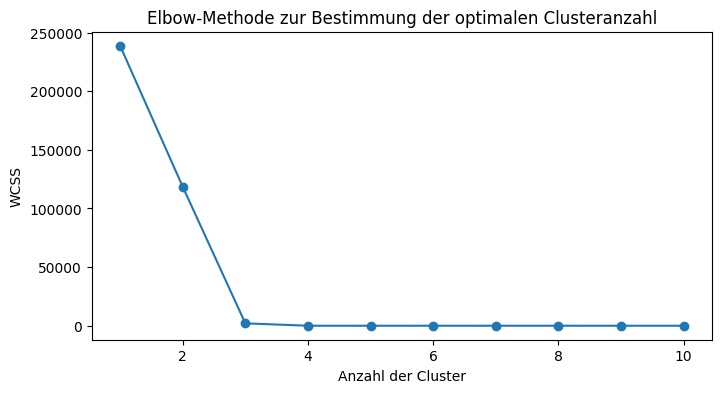

In [33]:
# 4. Bestimmung der optimalen Clusteranzahl (Elbow-Methode)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow-Methode zur Bestimmung der optimalen Clusteranzahl')
plt.xlabel('Anzahl der Cluster')
plt.ylabel('WCSS')
plt.show()

In [34]:

# Hier kannst du anhand des Plots die optimale Clusteranzahl auswählen
n_clusters = 2  # Beispiel: 3 Cluster, bitte anpassen


In [35]:
# 5. Clusteranalyse mit KMeans
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(data_scaled)

# Ausgabe der ersten Zeilen mit den Clusterzuweisungen
print(df.head())

          hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...    No Deposit   
1     

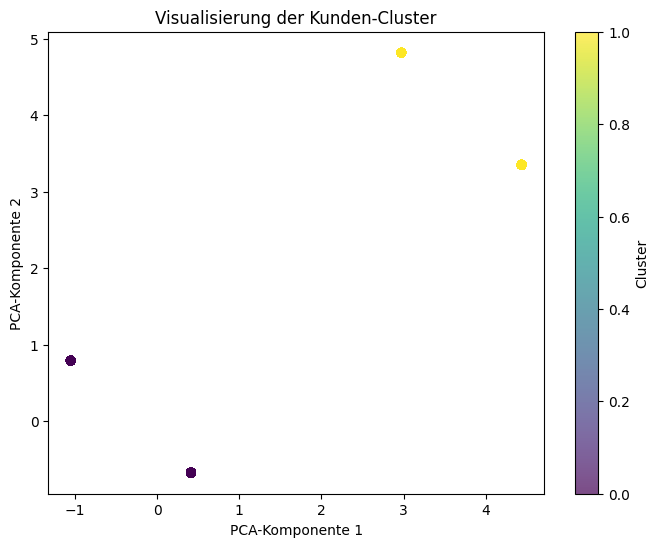

In [36]:
# 6. Visualisierung der Cluster
pca = PCA(n_components=2)
components = pca.fit_transform(data_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(components[:, 0], components[:, 1], c=df['Cluster'], cmap='viridis', alpha=0.7)
plt.xlabel('PCA-Komponente 1')
plt.ylabel('PCA-Komponente 2')
plt.title('Visualisierung der Kunden-Cluster')
plt.colorbar(label='Cluster')
plt.show()